In [124]:
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

#### HDI rank:

Type: Ordinal variable.

Reason: The HDI rank represents a ranking of countries based on their Human Development Index. The order is meaningful, but the difference between ranks is not necessarily uniform.

### Country:

Type: Nominal variable.

Reason: The names of countries are categorical and serve as labels. They do not imply any numerical or ranked relationship between them.

### Human Development Index (HDI) Value:

Type: Interval variable.

Reason: HDI values represent a composite index on a scale (usually 0 to 1), with meaningful differences between values, but no true zero point.

### Life expectancy at birth (years):

Type: Ratio variable.

Reason: Life expectancy is a continuous, quantitative measure with a meaningful zero point (0 years), allowing for meaningful comparisons of ratios (e.g., 80 years is twice as long as 40 years).

### Expected years of schooling (years):

Type: Ratio variable.

Reason: This is a quantitative measure with a meaningful zero (0 years), and comparisons between values are meaningful in terms of ratios.

### Mean years of schooling (years):

Type: Ratio variable.

Reason: Similar to expected years of schooling, mean years of schooling is a quantitative measure with a true zero point.

### Gross national income (GNI) per capita (2017 PPP $):

Type: Ratio variable.

Reason: GNI per capita is a quantitative measure of income with a meaningful zero (no income), and you can compare income levels in terms of ratios.

### GNI per capita rank minus HDI rank:
Type: Ordinal variable.

Reason: This represents the difference between two ranks (GNI and HDI ranks), which retains the properties of ordinal data because ranks are inherently ordered but not evenly spaced.

In [125]:
data = pd.read_csv('./hdi_cleaned.csv')
data.head()

,rank,country,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI,GNI_per_capita,HDI rank
0,1,Switzerland,0.967,84.3,16.6,13.9,"69,433",6,1.0
1,2,Norway,0.966,83.4,18.6,13.1,"69,190",6,2.0
2,3,Iceland,0.959,82.8,19.1,13.8,"54,688",16,4.0
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,"62,486",6,3.0
4,5,Denmark,0.952,81.9,18.8,13.0,"62,019",6,8.0


In [126]:
data_description = data.describe()

data_description

,rank,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI_per_capita,HDI rank
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,191.000000
mean,96.854922,0.723741,71.844560,13.535751,9.011917,0.145078,96.146597
std,55.911665,0.155177,7.861522,3.029098,3.221399,14.575939,55.675559
min,1.000000,0.380000,53.000000,5.600000,1.300000,-54.000000,1.000000
25%,49.000000,0.602000,65.900000,11.600000,6.500000,-9.000000,48.500000
50%,97.000000,0.740000,72.200000,13.300000,9.400000,2.000000,95.000000
75%,145.000000,0.847000,77.900000,15.700000,11.700000,9.000000,144.500000
max,193.000000,0.967000,84.800000,21.100000,14.300000,40.000000,192.000000


---

# Correlation between life expectancy and educational attainment

A country's life expectancy aligns with SDG 3: Good Health and Well Being

Life expectancy is a key  measure of public, and reflects overall health. Healthcare quality and general living conditions in a country. It
provide's insight of health outcomes of a population.

A country's educational attainment aligns  SDG 4: Quality education.

Countries with higher years of education generally experience higher life expectancy, economic growth, political stability, and lower poverty and mortality rates, as education enhances health awareness, job opportunities, and civic engagement. These benefits illustrate how education fosters healthier, more prosperous, and more equitable societies.

For our analysis, we'll focus on SDG 4.4 (mean school years), tho both SDG 4.3 and 4.4 data can provide useful insights, a country's mean years of education is generally more relevant than expected years of education because it reflects educational experience that the current adult has actually achieved and therefore can be a stronger predictor on how much it affects a country's life expectancy.

Our analysis consists of finding how much realized education affects a life expectancy of a country, therefore mean schooling years will be the independent variable and the life expectancy will be the dependent variable.

* Dependent Variable: Life Expectancy
* Independent Variable: Mean Schooling Years

## Describing Life Expectancy

In [127]:
display(Markdown(f"Life Expectancy: "))
display(Markdown(f"$$\mu={data.life_expectancy.mean():.2f}$$"))
display(Markdown(f"$$\sigma={data.life_expectancy.std():.2f}$$"))

Life Expectancy: 

$$\mu=71.84$$

$$\sigma=7.86$$

## Describing Mean Schooling Years

* The dataset caps at 14.3 years

In [128]:
display(Markdown(f"Mean Schooling years: "))
display(Markdown(f"$$\mu={data.mean_schooling_years.mean():.2f}$$"))
display(Markdown(f"$$\sigma={data.mean_schooling_years.std():.2f}$$"))

Mean Schooling years: 

$$\mu=9.01$$

$$\sigma=3.22$$

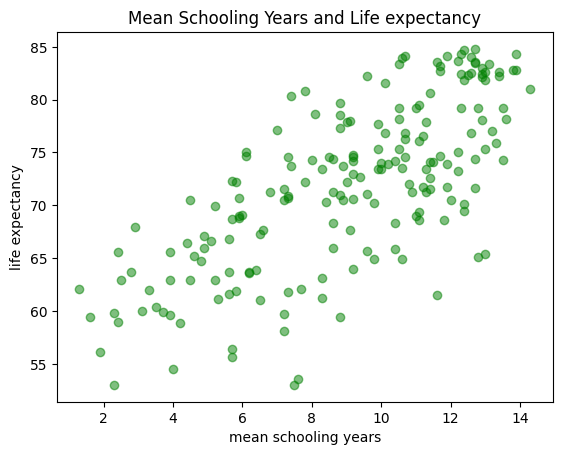

In [129]:
# independent variable, dependent variable
life_expectancy = data["life_expectancy"]
mean_schooling_years = data["mean_schooling_years"]

# the indepdent variable is plotted on the x axis and dependent variable is plotted on the y axis
plt.scatter(mean_schooling_years, life_expectancy, color="g", alpha=0.5)
plt.title("Mean Schooling Years and Life expectancy")
plt.xlabel("mean schooling years")
plt.ylabel("life expectancy")
plt.show()

Since both mean schooling years and life expectancy are both ratio variables we can appropriately analyze their relation with Pearson's coefficient.

In [130]:
r = mean_schooling_years.corr(life_expectancy)
print(f"Pearsons Correlation Coefficient: {r:.2f}")
display(Markdown(f"$$r={r:.2f}$$"))

Pearsons Correlation Coefficient: 0.72


$$r=0.72$$

|Correlation Coefficient (r)|	Interpretation|
| --- | --- |
| 1.0 | Perfect Positive Correlation |
| 0.7 to 0.99 | Strong Positive Correlation |
| 0.3 to 0.69 |	Moderate Positive Correlation |
| 0 to 0.29	| Weak Positive Correlation |
| 0	| No Correlation | 
| -0.29 to 0 | Weak Negative Correlation | 
| -0.3 to -0.69 |	Moderate Negative Correlation |
| -0.7 to -0.99	| Strong Negative Correlation |
| -1.0	Perfect | Negative Correlation |

In [131]:
# coefficient of determinance, how much the data fits the model
display(Markdown(f"$$r^2={(r*r):.4f}$$"))
display(Markdown(f"$$or$$"))
display(Markdown(f"$${(r*r) * 100:.2f}\%$$"))

$$r^2=0.5162$$

$$or$$

$$51.62\%$$

|Coefficient of determination (R2)|Interpretation|
|---|---|
|0|The model does not predict the outcome.|
|Between 0 and 1|The model partially predicts the outcome.|
|1|The model perfectly predicts the outcome.|

This indicates that $r^2$ of 0.52 or $51.62%$ of the variability is explained by the Mean School Years. This shows that slightly over half the changes in life expectancy can be attributed by the mean years of schooling.

$$y=mx + b$$

* $y$ is the dependent variable or the life expectancy
* $x$ is the independent variable or the mean schooling years
* $b$ is the intercept of the regression line when the expected value of life expectancy $y$ when $x = 0$
* $m$ is the slope of the regression line, the change in $y$ for one unit increase in $x$

In [132]:
# calculate m and b respectively (lots of formulas here)
slope, intercept = np.polyfit(mean_schooling_years, life_expectancy, 1)

# create the regression line
data['predicted_life_expectancy'] = intercept + slope * mean_schooling_years

display(Markdown(f"$$m=\\frac{{dy}}{{dx}}={slope:.2f}$$"))
display(Markdown(f"$$b=56.02$$"))
display(Markdown(f"$$y = {slope:.2f}x + {intercept:.2f}$$"))

$$m=\frac{dy}{dx}=1.75$$

$$b=56.02$$

$$y = 1.75x + 56.04$$

In [138]:
def regression_formula(x):
    return 1.75*x+56.04

# Generate values for x
# increases for each unit of 1 year
x_values = range(0, 14, 1)

# Calculate y values using the regression formula
y_values = [regression_formula(x) for x in x_values]

# Create a DataFrame to display the values as a table
final_prediction = pd.DataFrame({
    'x (Mean Schooling Years)': x_values,
    'y (Life Expectancy)': y_values
})

# Display the table
final_prediction

,x (Mean Schooling Years),y (Life Expectancy)
0,0,56.04
1,1,57.79
2,2,59.54
3,3,61.29
4,4,63.04
5,5,64.79
6,6,66.54
7,7,68.29
8,8,70.04
9,9,71.79


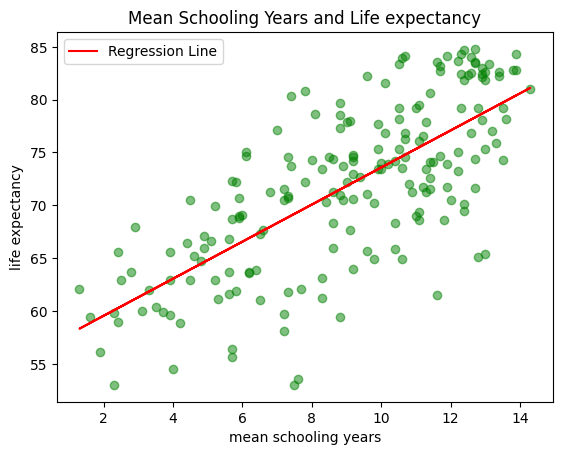

In [134]:
# Plot the regression line
plt.plot(mean_schooling_years, data['predicted_life_expectancy'], color='red', label='Regression Line')

# the indepdent variable is plotted on the x axis and dependent variable is plotted on the y axis
plt.scatter(mean_schooling_years, life_expectancy, color="g", alpha=0.5)
plt.title("Mean Schooling Years and Life expectancy")
plt.xlabel("mean schooling years")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

For each increase of 1 year increase of mean years of schooling $x$ we'd see a $1.75$ years increase in life expectancy which is quite noticeable.

## Testing

If I want to have a life expectancy of $80$ years, how many mean years of schooling do I need?


$$y=1.75x+56.04$$
$$y = 80$$
$$80=1.75x+56.04$$
$$80-56.04=1.75x+56.04$$
$$23.96=1.75x$$
$$\frac{23.96}{1.75}=\frac{1.75x}{1.75}$$
$$x=13.69$$

We would need a 13.69 mean years of schooling to have a life expectancy of 80